In [1]:
import warnings
warnings.filterwarnings('ignore')

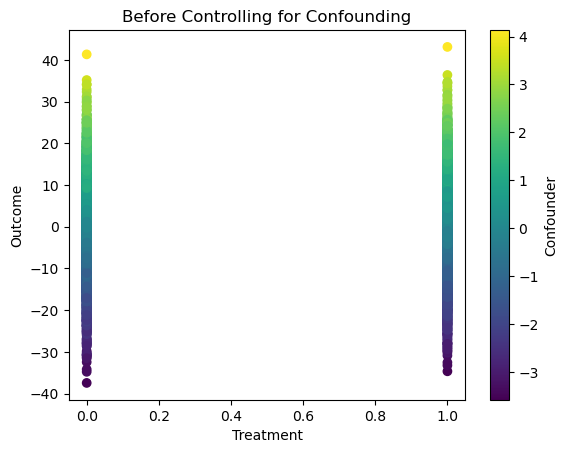

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dowhy
from dowhy import CausalModel
import dowhy.datasets

# Function to simulate data with binary treatment and common causes
def simulate_data_binary(sample_size=10000):
    np.random.seed(2)
    confounder = np.random.normal(0, 1, sample_size)
    treatment = np.random.choice([0, 1], size=sample_size, p=[0.5, 0.5])
    outcome = treatment + 10*confounder + np.random.normal(0, 1, sample_size)
    
    data = pd.DataFrame({'Treatment': treatment, 'Outcome': outcome, 'Confounder': confounder})
    return data

# Function to plot the data
def plot_data(data, title):
    plt.scatter(data['Treatment'], data['Outcome'], c=data['Confounder'], cmap='viridis')
    plt.title(title)
    plt.xlabel('Treatment')
    plt.ylabel('Outcome')
    plt.colorbar(label='Confounder')
    plt.show()

# Simulate data with binary treatment and common causes
data_binary = simulate_data_binary()

# Plot the data before controlling for confounding
plot_data(data_binary, 'Before Controlling for Confounding')

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                  
────────────(E[Outcome])
d[Treatment]            
Estimand assumption 1, Unconfoundedness: If U→{Treatment} and U→Outcome then P(Outcome|Treatment,,U) = P(Outcome|Treatment,)

## Realized estimand
b: Outcome~Treatment
Target units: ate

## Estimate
Mean value: 0.9301486429237663



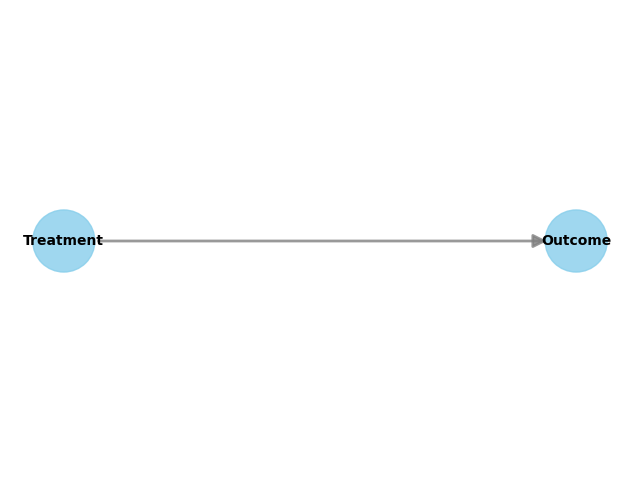

In [12]:
def do_causal_inference_binary(data, treatment_var, outcome_var, common_cause):
    model = CausalModel(
        data=data,
        treatment=treatment_var,
        outcome=outcome_var,
        common_causes=common_cause
    )
    
    identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
    m_name = "backdoor.propensity_score_weighting"
    if len(common_cause) == 0:
        m_name = "backdoor.linear_regression"
        
    causal_estimate = model.estimate_effect(identified_estimand,
                                            method_name=m_name)
    
    # Step 4: Refute the obtained estimate using multiple robustness checks.
    #refute_results = model.refute_estimate(identified_estimand, causal_estimate,
    #                                   method_name="random_common_cause")
    
    print(causal_estimate)
    model.view_model()
    plt.show()

# Perform causal inference without controlling for confounding
do_causal_inference_binary(data_binary, 'Treatment', 'Outcome', common_cause=[])

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                             
────────────(E[Outcome|Confounder])
d[Treatment]                       
Estimand assumption 1, Unconfoundedness: If U→{Treatment} and U→Outcome then P(Outcome|Treatment,Confounder,U) = P(Outcome|Treatment,Confounder)

## Realized estimand
b: Outcome~Treatment+Confounder
Target units: ate

## Estimate
Mean value: 1.0081067431370117



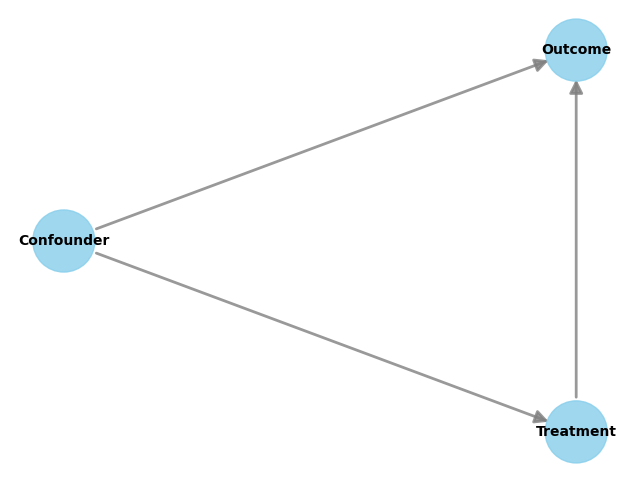

In [13]:

# Perform causal inference controlling for confounding
do_causal_inference_binary(data_binary, 'Treatment', 'Outcome', common_cause=['Confounder'])
